In [1]:
import pandas as pd
X_train = pd.read_csv(r"/workspaces/random-forest/data/interim/X_train.csv")
X_test = pd.read_csv(r"/workspaces/random-forest/data/interim/X_test.csv")
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,5,116.0,74.0,23,30.5,25.6,0.201,30
1,1,168.0,88.0,29,30.5,35.0,0.905,52
2,6,125.0,76.0,23,30.5,33.8,0.121,54
3,1,146.0,56.0,23,30.5,29.7,0.564,29
4,0,146.0,82.0,23,30.5,40.5,1.781,44
...,...,...,...,...,...,...,...,...
609,13,152.0,90.0,33,29.0,26.8,0.731,43
610,0,131.0,88.0,23,30.5,31.6,0.743,32
611,0,104.0,64.0,23,116.0,27.8,0.454,23
612,11,85.0,74.0,23,30.5,30.1,0.300,35


In [2]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0,93.0,100.0,39,72.0,43.4,1.021,35
1,3,116.0,74.0,15,105.0,26.3,0.107,24
2,4,99.0,72.0,17,30.5,25.6,0.294,28
3,1,125.0,50.0,40,167.0,33.3,0.962,28
4,3,176.0,86.0,27,156.0,33.3,1.154,52
...,...,...,...,...,...,...,...,...
149,4,129.0,86.0,20,270.0,35.1,0.231,23
150,3,106.0,72.0,23,30.5,25.8,0.207,27
151,3,173.0,82.0,48,465.0,38.4,2.137,25
152,0,105.0,64.0,41,142.0,41.5,0.173,22


In [3]:
y_train = pd.read_csv(r"/workspaces/random-forest/data/interim/y_train.csv")
y_test = pd.read_csv(r"/workspaces/random-forest/data/interim/y_test.csv")
y_test

,Outcome
0,0
1,0
2,0
3,1
4,1
...,...
149,0
150,0
151,1
152,0


In [4]:
y_train

,Outcome
0,0
1,1
2,1
3,0
4,0
...,...
609,1
610,1
611,0
612,0


In [5]:
from pickle import dump, load
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

accs = []
for p in [1, 0.8, 0.7, 0.6, 0.5]:
    selection_model = SelectKBest(f_classif, k = int(len(X_train.columns) * p))
    selection_model.fit(X_train, y_train)

    ix = selection_model.get_support()
    train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])

    

    model = RandomForestClassifier(random_state = 14)
    model.fit(train_sel, y_train)
    y_pred = model.predict(train_sel)
    acc = accuracy_score(y_train, y_pred)
    accs.append(acc)

best_acc = accs.index(max(accs))

/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vscode/.local/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vscode/.local/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

In [6]:
best_index=int(len(X_train.columns)*[1, 0.8, 0.7, 0.6, 0.5][best_acc])
best_index

8

In [7]:
selection_model = SelectKBest(f_classif, k = best_index)
selection_model.fit(X_train, y_train)

/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SelectKBest(k=8)

In [8]:
dump(selection_model, open(r"/workspaces/random-forest/models/selection_model.pk", "wb"))

In [9]:
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])
model = RandomForestClassifier(random_state = 14)
model.fit(X_train_sel, y_train)

/home/vscode/.local/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=14)

In [10]:
X_train_sel

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,5.0,116.0,74.0,23.0,30.5,25.6,0.201,30.0
1,1.0,168.0,88.0,29.0,30.5,35.0,0.905,52.0
2,6.0,125.0,76.0,23.0,30.5,33.8,0.121,54.0
3,1.0,146.0,56.0,23.0,30.5,29.7,0.564,29.0
4,0.0,146.0,82.0,23.0,30.5,40.5,1.781,44.0
...,...,...,...,...,...,...,...,...
609,13.0,152.0,90.0,33.0,29.0,26.8,0.731,43.0
610,0.0,131.0,88.0,23.0,30.5,31.6,0.743,32.0
611,0.0,104.0,64.0,23.0,116.0,27.8,0.454,23.0
612,11.0,85.0,74.0,23.0,30.5,30.1,0.300,35.0


In [11]:
X_test_sel

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.0,93.0,100.0,39.0,72.0,43.4,1.021,35.0
1,3.0,116.0,74.0,15.0,105.0,26.3,0.107,24.0
2,4.0,99.0,72.0,17.0,30.5,25.6,0.294,28.0
3,1.0,125.0,50.0,40.0,167.0,33.3,0.962,28.0
4,3.0,176.0,86.0,27.0,156.0,33.3,1.154,52.0
...,...,...,...,...,...,...,...,...
149,4.0,129.0,86.0,20.0,270.0,35.1,0.231,23.0
150,3.0,106.0,72.0,23.0,30.5,25.8,0.207,27.0
151,3.0,173.0,82.0,48.0,465.0,38.4,2.137,25.0
152,0.0,105.0,64.0,41.0,142.0,41.5,0.173,22.0


In [12]:
X_train_sel.to_csv(r"/workspaces/random-forest/data/processed/train_X_sel.csv", index=False)
X_test_sel.to_csv(r"/workspaces/random-forest/data/processed/test_X_sel.csv", index=False)

In [13]:
y_pred = model.predict(X_train_sel)
y_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,

In [14]:
from sklearn.metrics import accuracy_score

accuracy_score(y_train, y_pred)

1.0

In [15]:
y_pred = model.predict(X_test_sel)

In [16]:
accuracy_score(y_test, y_pred)

0.7597402597402597

In [17]:
from sklearn.model_selection import GridSearchCV

hyperparams = {
    "n_estimators":[38],
    "min_samples_split": [1,2,3,4,5,6],
    "max_features": [1,2,3,4,5,6],
    'random_state': [14]
}

grid = GridSearchCV(model, hyperparams, cv = 5)
grid

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=14),
             param_grid={'max_features': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [1, 2, 3, 4, 5, 6],
                         'n_estimators': [38], 'random_state': [14]})

In [18]:
grid.fit(X_train_sel, y_train)

/home/vscode/.local/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/vscode/.local/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/vscode/.local/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/vscode/.local/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

/home/vscode/.local/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/vscode/.local/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/vscode/.local/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/vscode/.local/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=14),
             param_grid={'max_features': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [1, 2, 3, 4, 5, 6],
                         'n_estimators': [38], 'random_state': [14]})

In [19]:
grid.best_params_

{'max_features': 2,
 'min_samples_split': 6,
 'n_estimators': 38,
 'random_state': 14}

In [20]:
grid.best_estimator_

RandomForestClassifier(max_features=2, min_samples_split=6, n_estimators=38,
                       random_state=14)

In [21]:
best_model = grid.best_estimator_
best_model.fit(X_train_sel, y_train)

/home/vscode/.local/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_features=2, min_samples_split=6, n_estimators=38,
                       random_state=14)

In [22]:
y_pred = best_model.predict(X_train_sel)

In [23]:
y_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,

In [24]:
accuracy_score(y_train, y_pred)

0.9723127035830619

In [25]:
y_pred_test = best_model.predict(X_test_sel)

In [26]:
y_pred_test

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [27]:
accuracy_score(y_test,y_pred_test)

0.8116883116883117

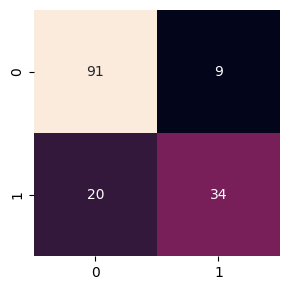

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

bank_cm = confusion_matrix(y_test, y_pred_test)

# Let's draw this matrix to make it more visual
cm_df = pd.DataFrame(bank_cm)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()

In [29]:
dump(best_model, open(r"/workspaces/random-forest/models/random_forest_model.pk", "wb"))